<a href="https://colab.research.google.com/github/RobJChambers/Test-repository/blob/main/HeadDataWorkingContours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.3 MB/s 


In [ ]:
import os
import pydicom as dicom
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import numpy as np

## The first program that iterates all the different ROI scans on to different graphs (Slow because of all the graphs it has to plot).


In [ ]:
# Reading in Paths
path_structure = "/content/drive/MyDrive/Colab Notebooks/New Head Data/HNSCC/HNSCC-01-0001/12-05-1998-NA-RT SIMULATION-43582/1.000000-NA-78710/1-1.dcm"
ds_struct = dicom.dcmread(path_structure)

path_ct = "/content/drive/MyDrive/Colab Notebooks/New Head Data/HNSCC/HNSCC-01-0001/12-05-1998-NA-RT SIMULATION-43582/NA-28768/1-010.dcm"
ds_ct = dicom.dcmread(path_ct)

#------------------------- Contour Data Code------------------------------------

# Iteration through all the contours on one CT scan

%timeit for contour in ds_struct.ROIContourSequence[9].ContourSequence:
          point_number = contour.NumberOfContourPoints

          contour_array_old_coords = np.reshape(contour.ContourData, (point_number, 3))

          new_x = (contour_array_old_coords[:,0] - ds_ct.ImagePositionPatient[0])/ ds_ct.PixelSpacing[0]
          new_y = (contour_array_old_coords[:,1] - ds_ct.ImagePositionPatient[1])/ ds_ct.PixelSpacing[1]
          xy_pairs = list(zip(new_x, new_y))

          ct_z_coord = float(contour_array_old_coords[0][2])
          slice_id = int(round((ct_z_coord - ds_ct.ImagePositionPatient[2])))

          plt.rcParams["figure.figsize"] = [7.00, 3.50]
          plt.rcParams["figure.autolayout"] = True
          fig, ax = plt.subplots()
          im = ax.imshow(ds_ct.pixel_array, cmap=plt.cm.gray)
          ax.plot(new_x, new_y, linewidth=0.5, color='red')
          plt.show()

IndentationError: ignored

## The second program that iterates through all contours for one CT scan and plots them all on to one graph (looks a bit messy though at least its all contained on one graph).

117


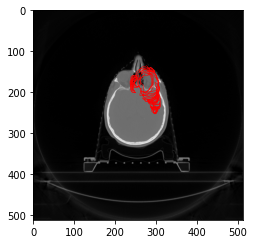

In [ ]:
# Reading in Paths
path_structure = "/content/drive/MyDrive/Colab Notebooks/New Head Data/HNSCC/HNSCC-01-0001/12-05-1998-NA-RT SIMULATION-43582/1.000000-NA-78710/1-1.dcm"
ds_struct = dicom.dcmread(path_structure)

path_ct = "/content/drive/MyDrive/Colab Notebooks/New Head Data/HNSCC/HNSCC-01-0001/12-05-1998-NA-RT SIMULATION-43582/NA-28768/1-010.dcm"
ds_ct = dicom.dcmread(path_ct)
directory = "/content/drive/MyDrive/Colab Notebooks/New Head Data/HNSCC/HNSCC-01-0001/12-05-1998-NA-RT SIMULATION-43582/NA-28768"

number_of_files = len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])
print(number_of_files)
#------------------------- Contour Data Code------------------------------------

# Iteration through all the contours on one CT scan

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
im = ax.imshow(ds_ct.pixel_array, cmap=plt.cm.gray)
 
for contour in ds_struct.ROIContourSequence[9].ContourSequence:
    point_number = contour.NumberOfContourPoints
    
    contour_array_old_coords = np.reshape(contour.ContourData, (point_number, 3))
 
    new_x = (contour_array_old_coords[:,0] - ds_ct.ImagePositionPatient[0])/ ds_ct.PixelSpacing[0]
    new_y = (contour_array_old_coords[:,1] - ds_ct.ImagePositionPatient[1])/ ds_ct.PixelSpacing[1]
    xy_pairs = list(zip(new_x, new_y))
 
    ct_z_coord = float(contour_array_old_coords[0][2])
    slice_id = int(round((ct_z_coord - ds_ct.ImagePositionPatient[2])))
 
    #im = ax.imshow(ds_ct.pixel_array, cmap=plt.cm.gray)
    ax.plot(new_x, new_y, linewidth=0.5, color='red')

plt.show()


## The third Program that aims to plot all the contours from a given dataset onto their relevant CT images.

In [ ]:
# Reading in Paths
path_structure = "/content/drive/MyDrive/Colab Notebooks/New Head Data/HNSCC/HNSCC-01-0001/12-05-1998-NA-RT SIMULATION-43582/1.000000-NA-78710/1-1.dcm"
ds_struct = dicom.dcmread(path_structure)

directory = "/content/drive/MyDrive/Colab Notebooks/New Head Data/HNSCC/HNSCC-01-0001/12-05-1998-NA-RT SIMULATION-43582/NA-28768"

#------------------------- Contour Data Code------------------------------------

# Iteration through a whole patients dataset
for slice in os.scandir(directory):
    if slice.is_file():
        ds_ct = dicom.dcmread(slice.path)
        fig, axis = plt.subplots()
        axis.imshow(ds_ct.pixel_array, cmap=plt.cm.gray)
        slice_id = ds_ct.SOPInstanceUID

        # Plotting iteratively through all the contours on one CT scan
        for i in range(len(ds_struct.ROIContourSequence)):
            for j in range(len(ds_struct.ROIContourSequence[i].ContourSequence)):
                for k in range(len(ds_struct.ROIContourSequence[i].ContourSequence[j].ContourImageSequence)):
                    if ds_struct.ROIContourSequence[i].ContourSequence[j].ContourImageSequence[k].ReferencedSOPInstanceUID == slice_id:
                        point_number = ds_struct.ROIContourSequence[i].ContourSequence[j].NumberOfContourPoints

                        contour_array_old_coords = np.reshape(ds_struct.ROIContourSequence[i].ContourSequence[j].ContourData, (point_number, 3))
                        new_x = (contour_array_old_coords[:,0] - ds_ct.ImagePositionPatient[0])/ ds_ct.PixelSpacing[0]
                        new_y = (contour_array_old_coords[:,1] - ds_ct.ImagePositionPatient[1])/ ds_ct.PixelSpacing[1]
                        #xy_pairs = list(zip(new_x, new_y))
                        ct_z_coord = float(contour_array_old_coords[0][2])
                        #slice_id = int(round((ct_z_coord - ds_ct.ImagePositionPatient[2])))
                        axis.plot(new_x, new_y, linewidth=0.5)
